# Partie 1

In [89]:
# Lire les données du fichier CSV ‘dataset-sell4all.csv’ qui contient les données démographiques et de dépenses des utilisateurs
import pandas as pd
data = pd.read_csv('data-sell4all.csv')
print(data)

                 Pays           Age         Genre Depenses des clients
0              France             32       Female                150.5
1             Germany             45         Male               200.75
2               Spain             28       Female                75.25
3               Italy             39         Male                  180
4                  UK             52       Female                250.3
..                ...            ...          ...                  ...
60      Digital Realm            NaN           AI           1010101.01
61         Multiverse              ∞   Non-Binary                    π
62              Error        #VALUE!          404              #DIV/0!
63      Greece, Italy          25;30  Male;Female              100+200
64   United  Kingdom   Not Available        Other            Priceless

[65 rows x 4 columns]


In [90]:
# Afficher des informations sur les 5 premières lignes du fichier CSV,
df = pd.DataFrame(data)
df.head()

,Pays,Age,Genre,Depenses des clients
0,France,32,Female,150.5
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180
4,UK,52,Female,250.3


In [91]:
# nombre de lignes
nbr_ligne = len(df)
print(nbr_ligne)

65


In [92]:
# les colonnes du fichier CSV
columns = df.columns
print(columns)

Index(['Pays', ' Age ', 'Genre', 'Depenses des clients'], dtype='object')


In [93]:
# les types de données des champs du fichier CSV
data_types = df.dtypes
print("Data types of the columns :\n", data_types)

Data types of the columns :
 Pays                    object
 Age                    object
Genre                   object
Depenses des clients    object
dtype: object


In [94]:
# Expliquer les détails affichés du résumé technique dans une cellule de démarque du bloc-notes Jupyter


# Explication du résumé technique des données

#### 1. Nombre de lignes :

J'ai calculé le nombre total de lignes dans le fichier CSV en utilisant `len(df)`. Cela me permet de savoir combien d'enregistrements individuels sont présents dans le fichier.

#### 2. Colonnes du fichier CSV :

J'ai extrait les noms des colonnes du fichier CSV avec `df.columns`. Les colonnes représentent les différentes variables ou attributs pour chaque enregistrement. Je peux voir quelles sont les variables disponibles dans mon Data set.

#### 3. Types de données des champs du fichier CSV :

J'ai affiché les types de données associés à chaque colonne avec la fonction `df.dtypes`.

Les types de données me montrent comment les données sont structurées :

- **object** : Représente des données textuelles ou des chaînes de caractères.
- **int64** : Représente des entiers.
- **float64** : Représente des nombres décimaux ou flottants.
- **datetime64** : Représente des dates ou des heures.

Dans mon résumé, toutes les colonnes sont de type `object`. Cela peut signifier que même les colonnes qui devraient contenir des valeurs numériques ou des dates sont stockées sous forme de chaînes de caractères.

Cette situation peut nécessiter des conversions de type (par exemple, de `object` à `int` ou `float`) pour effectuer des analyses quantitatives précises.


In [95]:
# Calculer la médiane et la moyenne des colonnes Âge et Dépenses des clients
# Age 
df[' Age '] = pd.to_numeric(df[' Age '], errors='coerce').fillna(0)
moyenne = df[' Age '].mean()
mediane = df[' Age '].median()

print("La moyenne de L'Âge c'est : " , moyenne)
print("La médiane de L'Âge c'est : " , mediane)


La moyenne de L'Âge c'est :  47.58461538461538
La médiane de L'Âge c'est :  35.0


In [96]:
#  Dépenses des clients
df['Depenses des clients'] = pd.to_numeric(df['Depenses des clients'], errors='coerce').fillna(0)
moyenne_d = df['Depenses des clients'].mean()
mediane_d = df['Depenses des clients'].median()

print("La moyenne de dépenses des clients c'est : " , moyenne_d)
print("La médiane de dépenses des clients c'est : " , mediane_d)

La moyenne de dépenses des clients c'est :  31062.774
La médiane de dépenses des clients c'est :  155.5


# Partie 2

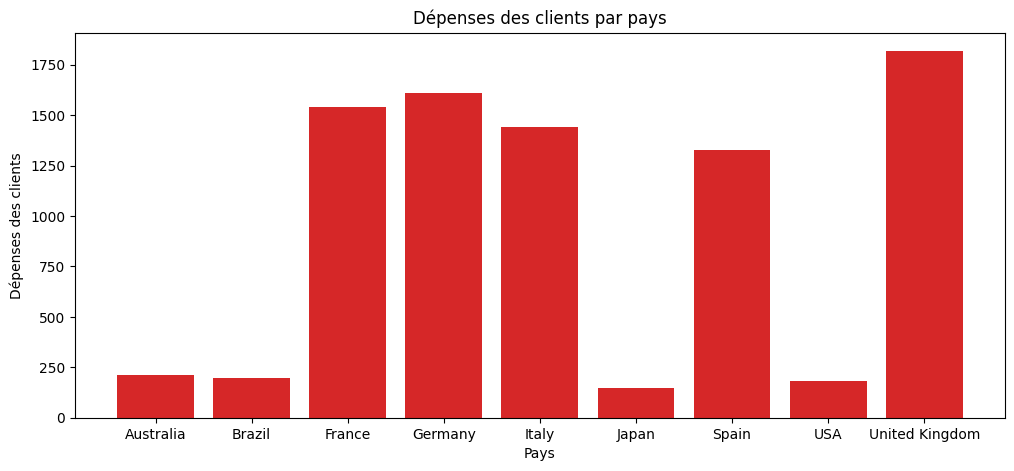

In [108]:
# Créer une visualisation des données du graphique à barres qui montre les dépenses des clients par pays
import matplotlib.pyplot as plt
import pandas as pd

# Clean country names
df['Pays'] = df['Pays'].replace({
    'United  Kingdom': 'United Kingdom',
    'UK': 'United Kingdom',
})

valid_countries = [
    "United Kingdom", "Australia", "Brazil", "Canada", "France", 
    "Germany", "Italy", "Japan", "Spain", "USA"
]

df_filtered = df[df['Pays'].isin(valid_countries)]
df_grouped = df_filtered.groupby('Pays', as_index=False)['Depenses des clients'].sum()
pays = df_grouped['Pays']
depenses = df_grouped['Depenses des clients']


fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(pays, depenses, color='tab:red')

ax.set_title('Dépenses des clients par pays')
ax.set_xlabel('Pays')
ax.set_ylabel('Dépenses des clients')

plt.show()

In [99]:
# Nettoyer les lignes avec moins de 10 € de dépenses client : supprimez toutes les lignes d’utilisateurs ayant dépensé moins de 10 € sur le site
df = df[df['Depenses des clients'] >= 10]
print(df)

              Pays    Age       Genre  Depenses des clients
0           France    32.0     Female                150.50
1          Germany    45.0       Male                200.75
2            Spain    28.0     Female                 75.25
3            Italy    39.0       Male                180.00
4   United Kingdom    52.0     Female                250.30
5           France    22.0       Male                 90.00
6          Germany    36.0     Female                175.50
7            Spain    41.0       Male                120.75
8            Italy    29.0     Female                 95.25
9   United Kingdom    48.0       Male                220.00
10          France    35.0     Female                160.25
11         Germany    27.0       Male                 85.50
12           Spain    50.0     Female                190.75
13           Italy    33.0       Male                140.00
14  United Kingdom    44.0     Female                210.50
15          France    31.0       Male   

In [102]:
# Nettoyer les doublons : supprimer toutes les lignes qui apparaissent plus d’une fois dans les données,
df = df.drop_duplicates()
print(df)

              Pays    Age       Genre  Depenses des clients
0           France    32.0     Female                150.50
1          Germany    45.0       Male                200.75
2            Spain    28.0     Female                 75.25
3            Italy    39.0       Male                180.00
4   United Kingdom    52.0     Female                250.30
5           France    22.0       Male                 90.00
6          Germany    36.0     Female                175.50
7            Spain    41.0       Male                120.75
8            Italy    29.0     Female                 95.25
9   United Kingdom    48.0       Male                220.00
10          France    35.0     Female                160.25
11         Germany    27.0       Male                 85.50
12           Spain    50.0     Female                190.75
13           Italy    33.0       Male                140.00
14  United Kingdom    44.0     Female                210.50
15          France    31.0       Male   

In [109]:
# Écrire les données nettoyées dans un nouveau fichier CSV avec uniquement les colonnes suivantes
df_cleaned = df
df_cleaned.to_csv('donnees_nettoyees.csv', index = False)